<a href="https://colab.research.google.com/github/sgreen112/PythonDataAnalyticsProject1/blob/main/Python_Project_3_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
import pandas as pd
from pathlib import Path

## Import Upload Dataframe

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/201306-citibike-tripdata.csv')

##Take an overview of the data

In [3]:
df.head(100)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8299,2013-06-01 00:35:51,2013-06-01 02:54:10,481,S 3 St & Bedford Ave,40.712605,-73.962644,312.0,Allen St & Stanton St,40.722055,-73.989111,19318,Customer,NaN,0
96,357,2013-06-01 00:36:02,2013-06-01 00:41:59,439,E 4 St & 2 Ave,40.726281,-73.989780,504.0,1 Ave & E 16 St,40.732219,-73.981656,18586,Subscriber,1983.0,1
97,2215,2013-06-01 00:37:15,2013-06-01 01:14:10,157,Henry St & Atlantic Ave,40.690893,-73.996123,398.0,Atlantic Ave & Furman St,40.691652,-73.999979,19878,Customer,NaN,0
98,915,2013-06-01 00:37:56,2013-06-01 00:53:11,143,Clinton St & Joralemon St,40.692395,-73.993379,83.0,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19810,Subscriber,1985.0,1


In [4]:
df.groupby('usertype')['bikeid'].count()

usertype
Customer      240319
Subscriber    337384
Name: bikeid, dtype: int64

- tripduration is measured in seconds
- Time is military time
- Gender (Zero=unknown; 1=male; 2=female) (After research) Foot note
- Remove zeros for data cleaning

In [5]:
df.gender.unique()

array([1, 0, 2])

# Data cleaning
- Removed value 0 from column gender  

In [6]:
df1 = df.loc[df['gender']!=0]
display(df1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
6,2057,2013-06-01 00:02:33,2013-06-01 00:36:50,285,Broadway & E 14 St,40.734546,-73.990741,532.0,S 5 Pl & S 5 St,40.710451,-73.960876,15693,Subscriber,1991.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577687,436,2013-06-30 23:58:09,2013-07-01 00:05:25,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,403.0,E 2 St & 2 Ave,40.725029,-73.990697,19454,Subscriber,1982.0,1
577689,185,2013-06-30 23:57:52,2013-07-01 00:00:57,323,Lawrence St & Willoughby St,40.692362,-73.986317,293.0,Lafayette St & E 8 St,40.730207,-73.991026,16746,Subscriber,1982.0,1
577690,595,2013-06-30 23:58:39,2013-07-01 00:08:34,360,William St & Pine St,40.707179,-74.008873,329.0,Greenwich St & North Moore St,40.720152,-74.010365,19290,Subscriber,1985.0,1
577698,925,2013-06-30 23:59:27,2013-07-01 00:14:52,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,15250,Subscriber,1964.0,1


In [7]:
df1.usertype.unique()

array(['Subscriber'], dtype=object)

## Gather more information on users by Birth Year (Age)




In [8]:
df_Group_by_Age= df1.groupby('birth year')['bikeid'].count()
display(df_Group_by_Age)

birth year
1899.0     33
1900.0     83
1901.0     14
1913.0     13
1920.0      5
         ... 
1993.0    752
1994.0    319
1995.0    422
1996.0    268
1997.0    198
Name: bikeid, Length: 76, dtype: int64

## Data Cleaning to remove value outliers (years 1899-1939) from the dataset

In [9]:
df_Group_by_Age1= df_Group_by_Age.loc['1940':'2023']
display(df_Group_by_Age1)

birth year
1940.0      138
1941.0      181
1942.0      518
1943.0      228
1944.0      485
1945.0      464
1946.0      710
1947.0      732
1948.0     1270
1949.0     1104
1950.0     1804
1951.0     1666
1952.0     1743
1953.0     2504
1954.0     2576
1955.0     2904
1956.0     3587
1957.0     3870
1958.0     4315
1959.0     4040
1960.0     5046
1961.0     5097
1962.0     5719
1963.0     5855
1964.0     6210
1965.0     6416
1966.0     6761
1967.0     6611
1968.0     7248
1969.0     9016
1970.0     9849
1971.0     7791
1972.0     8810
1973.0     8296
1974.0     9765
1975.0     9868
1976.0    11123
1977.0    10969
1978.0    12353
1979.0    12461
1980.0    13822
1981.0    14902
1982.0    14427
1983.0    16274
1984.0    13565
1985.0    15077
1986.0    13065
1987.0    10580
1988.0     8450
1989.0     6403
1990.0     4547
1991.0     2065
1992.0     1201
1993.0      752
1994.0      319
1995.0      422
1996.0      268
1997.0      198
Name: bikeid, dtype: int64

<Axes: title={'center': 'Total Number of Subscriptions by Birth Year'}, xlabel='Birth Year', ylabel='Total Subscriptions'>

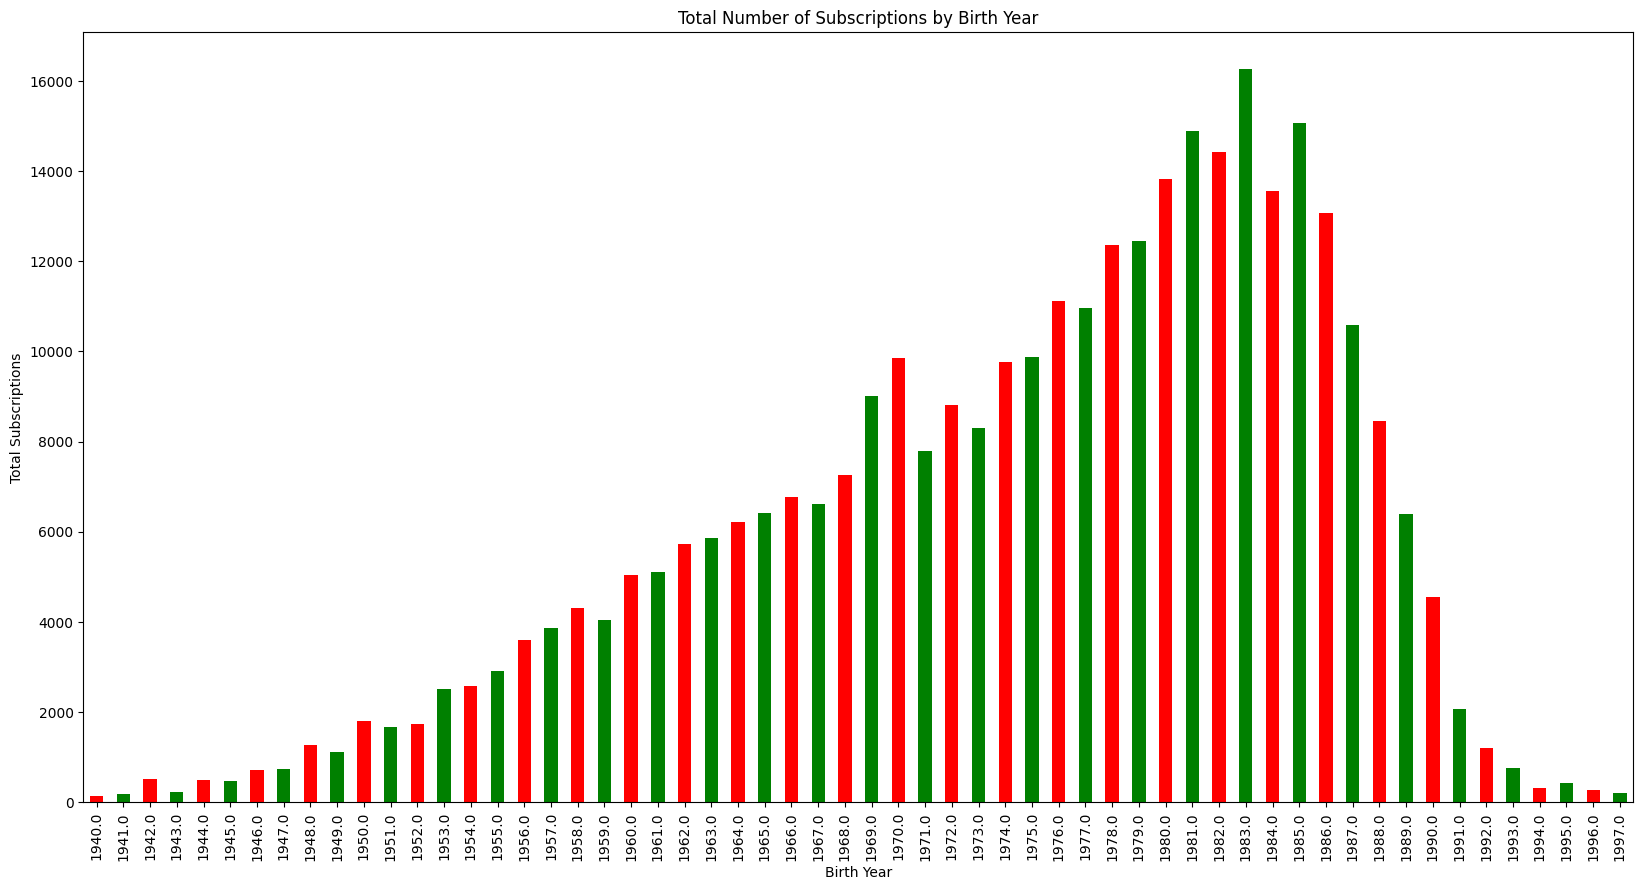

In [10]:
df_Group_by_Age1.plot(kind= 'bar', title= 'Total Number of Subscriptions by Birth Year', xlabel='Birth Year', ylabel= 'Total Subscriptions', color= ['red','green'], figsize= (20,10))

## Gather more information on users by Gender

In [11]:
Avg_Gender_Duration = df1.groupby('gender')['tripduration'].mean()
Avg_Gender_Duration.index= ['Male','Female']
display(Avg_Gender_Duration)

Male      1063.548723
Female    1233.249445
Name: tripduration, dtype: float64

<Axes: title={'center': 'Average Seconds Spent on Bike per Gender'}, xlabel='Gender', ylabel='Average Seconds'>

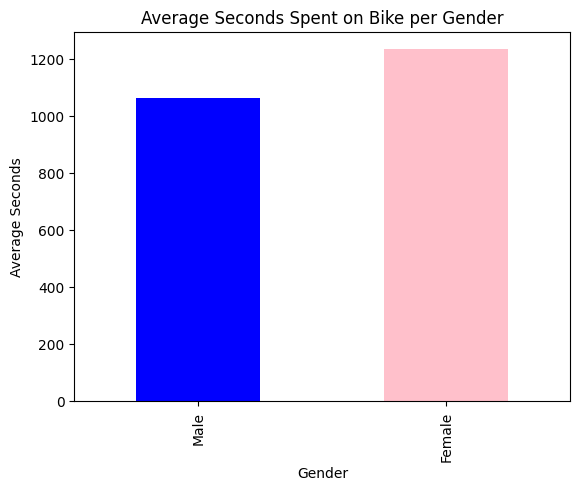

In [12]:
Avg_Gender_Duration.plot(kind = 'bar', xlabel= 'Gender', ylabel= 'Average Seconds', title= 'Average Seconds Spent on Bike per Gender', color= ['blue','pink'])

In [13]:
Total_Gender_Trips= df1.groupby('gender')['tripduration'].count()
Total_Gender_Trips.index= ['Male','Female']
display(Total_Gender_Trips)

Male      263492
Female     73463
Name: tripduration, dtype: int64

<Axes: title={'center': 'Total Trips on Bike per Gender'}, xlabel='Gender', ylabel='Total Trips'>

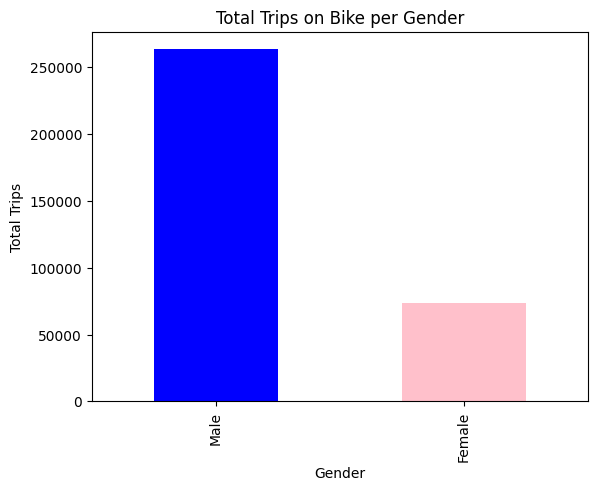

In [14]:
Total_Gender_Trips.plot(kind = 'bar', xlabel= 'Gender', ylabel= 'Total Trips', title= 'Total Trips on Bike per Gender', color= ['blue','pink'])


- Females take longer trips on average but take fewer trips overall
- Males take shorter trips on average but more trips in total

## Gather more information on popular start and end locations


In [15]:
df1.groupby(['start station name','end station name']).count()

tripduration  starttime  \
start station name end station name                                        
1 Ave & E 16 St    1 Ave & E 16 St                         43         43   
                   1 Ave & E 18 St                         20         20   
                   1 Ave & E 30 St                         23         23   
                   1 Ave & E 44 St                         29         29   
                   10 Ave & W 28 St                         3          3   
...                                                       ...        ...   
York St & Jay St   West Thames St                           2          2   
                   William St & Pine St                     3          3   
                   Willoughby Ave & Walworth St             8          8   
                   Wythe Ave & Metropolitan Ave             9          9   
                   York St & Jay St                        46         46   

                                                 stoptime  start station id  \
start station name end station name                                           
1 Ave & E 16 St    1 Ave & E 16 St                     43                43   
                   1 Ave & E 18 St                     20                20   
                   1 Ave & E 30 St                     23                23   
                   1 Ave & E 44 St                     29                29   
                   10 Ave & W 28 St                     3                 3   
...                                                   ...               ...   
York St & Jay St   West Thames St                       2                 2   
                   William St & Pine St                 3                 3   
                   Willoughby Ave & Walworth St         8                 8   
                   Wythe Ave & Metropolitan Ave         9                 9   
                   York St & Jay St                    46                46   

                                                 start station latitude  \
start station name end station name                                       
1 Ave & E 16 St    1 Ave & E 16 St                                   43   
                   1 Ave & E 18 St                                   20   
                   1 Ave & E 30 St                                   23   
                   1 Ave & E 44 St                                   29   
                   10 Ave & W 28 St                                   3   
...                                                                 ...   
York St & Jay St   West Thames St                                     2   
                   William St & Pine St                               3   
                   Willoughby Ave & Walworth St                       8   
                   Wythe Ave & Metropolitan Ave                       9   
                   York St & Jay St                                  46   

                                                 start station longitude  \
start station name end station name                                        
1 Ave & E 16 St    1 Ave & E 16 St                                    43   
                   1 Ave & E 18 St                                    20   
                   1 Ave & E 30 St                                    23   
                   1 Ave & E 44 St                                    29   
                   10 Ave & W 28 St                                    3   
...                                                                  ...   
York St & Jay St   West Thames St                                      2   
                   William St & Pine St                                3   
                   Willoughby Ave & Walworth St                        8   
                   Wythe Ave & Metropolitan Ave                        9   
                   York St & Jay St                                   46   

                                                 end station id  \


In [16]:
Start_Station_Count = df1.groupby(['start station name'])['tripduration'].count().sort_values().tail(15)
display(Start_Station_Count)

start station name
9 Ave & W 14 St                  2187
Carmine St & 6 Ave               2203
W 41 St & 8 Ave                  2204
Christopher St & Greenwich St    2264
West Thames St                   2363
E 24 St & Park Ave S             2392
Pershing Square North            2523
Broadway & W 24 St               2662
Broadway & E 22 St               2699
Broadway & W 58 St               2743
8 Ave & W 31 St N                2752
Lafayette St & E 8 St            2842
W 20 St & 11 Ave                 3141
Broadway & E 14 St               3212
E 17 St & Broadway               3483
Name: tripduration, dtype: int64

<Axes: title={'center': 'Top 15 Starting Stations'}, xlabel='Start Station Name', ylabel='Total Starting Trips'>

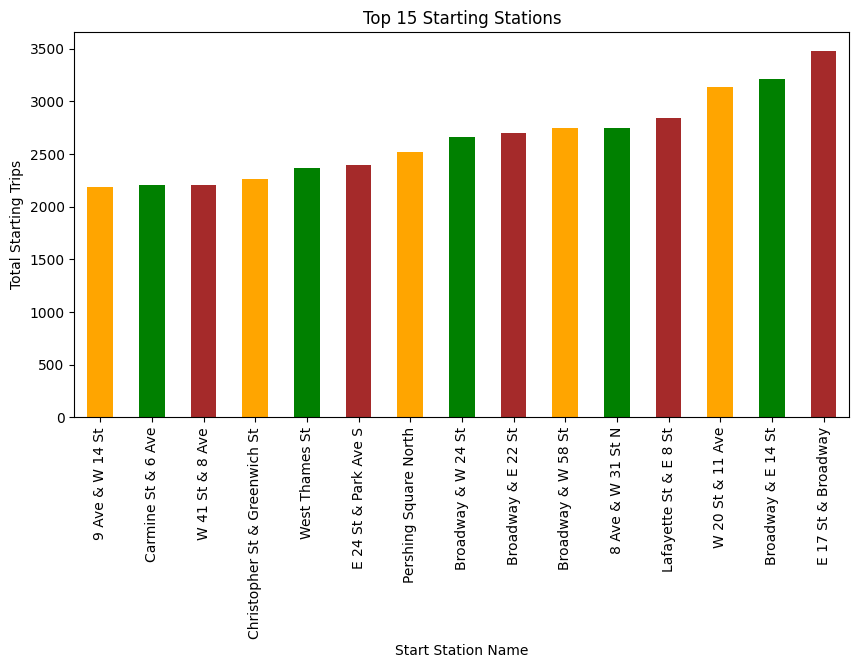

In [17]:
Start_Station_Count.plot( kind= 'bar', color= ['orange', 'green', 'brown'], title= 'Top 15 Starting Stations', ylabel= 'Total Starting Trips', xlabel= 'Start Station Name', figsize= (10,5))

In [18]:
End_Station_Count = df1.groupby(['end station name'])['tripduration'].count().sort_values().tail(15)
display(End_Station_Count)

end station name
Pershing Square North            2108
Christopher St & Greenwich St    2160
9 Ave & W 22 St                  2184
9 Ave & W 14 St                  2189
Carmine St & 6 Ave               2197
E 24 St & Park Ave S             2263
West Thames St                   2397
Broadway & W 58 St               2399
Broadway & E 22 St               2557
8 Ave & W 31 St N                2585
Lafayette St & E 8 St            2686
Broadway & W 24 St               2814
Broadway & E 14 St               3043
W 20 St & 11 Ave                 3202
E 17 St & Broadway               3524
Name: tripduration, dtype: int64

<Axes: title={'center': 'Top 15 Ending Stations'}, xlabel='End Station Name', ylabel='Total Ending Trips'>

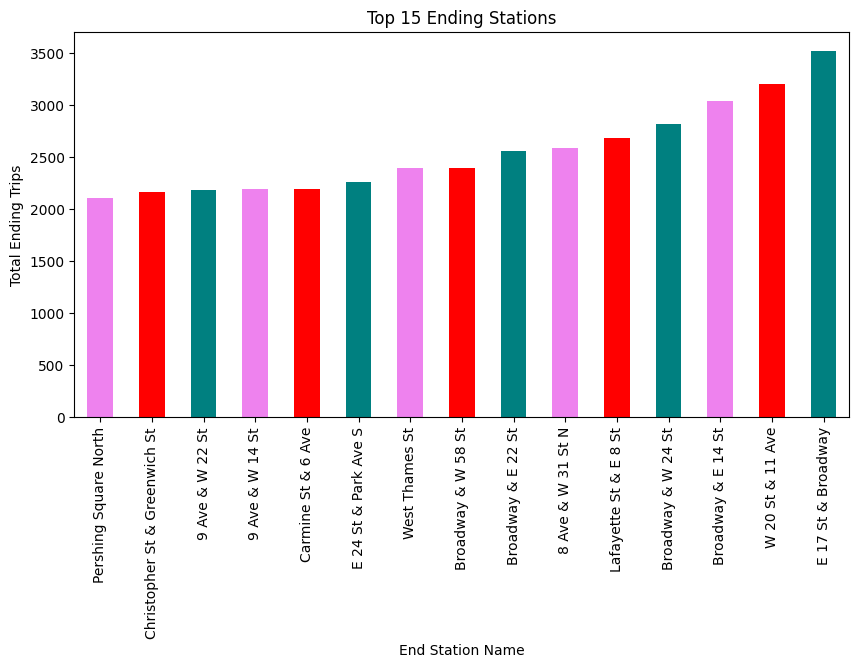

In [19]:
End_Station_Count.plot( kind= 'bar', color= ['violet', 'red', 'teal'], title= 'Top 15 Ending Stations', ylabel= 'Total Ending Trips', xlabel= 'End Station Name', figsize= (10,5))

## Gather more information on users by usertype (Subscription vs Customer)


In [20]:
Usertype_Avg_Trip = df.groupby(['usertype'])['tripduration'].mean()
display(Usertype_Avg_Trip)

usertype
Customer      1753.233523
Subscriber    1101.423426
Name: tripduration, dtype: float64

<Axes: title={'center': 'Average Trips on Bike'}, xlabel='User Type', ylabel='Average Duration'>

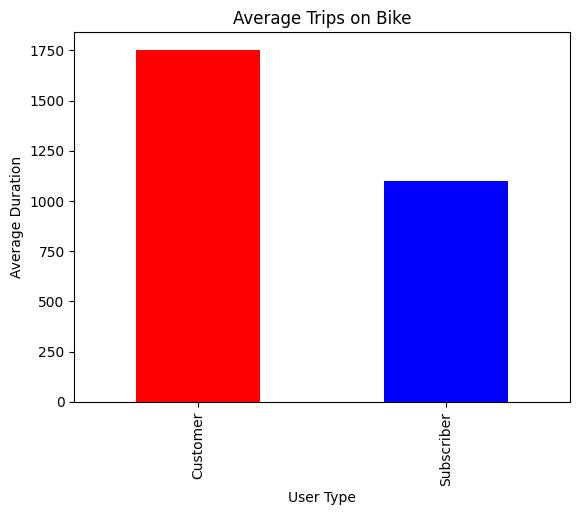

In [29]:
Usertype_Avg_Trip.plot(kind = 'bar', xlabel= 'User Type', ylabel= 'Average Duration', title= 'Average Trips on Bike', color= ['red', 'blue'])

In [22]:
Usertype_Count_Trip = df.groupby(['usertype'])['tripduration'].count()
display(Usertype_Count_Trip)

usertype
Customer      240319
Subscriber    337384
Name: tripduration, dtype: int64

<Axes: title={'center': 'Total Trips on Bike'}, xlabel='User Type', ylabel='Total Trips'>

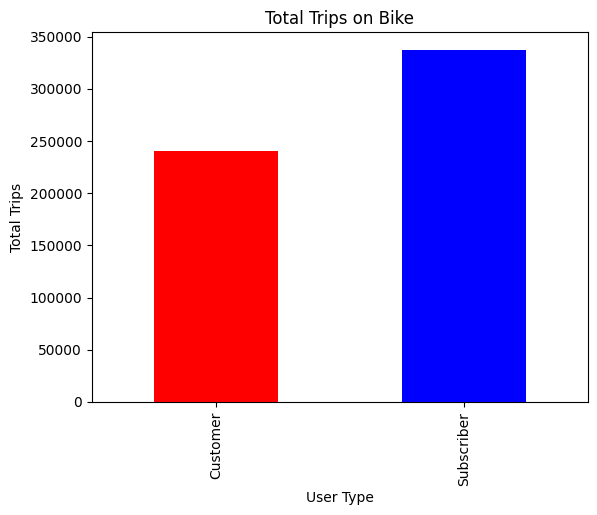

In [23]:
Usertype_Count_Trip.plot(kind = 'bar', xlabel= 'User Type', ylabel= 'Total Trips', title= 'Total Trips on Bike', color= ['red','blue'])